In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
spam=pd.read_csv("spam.csv",encoding='latin1')

In [9]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5399,ham,And he's apparently bffs with carly quick now,NaN,NaN,NaN
5326,ham,What makes you most happy?,NaN,NaN,NaN
1736,ham,I will come tomorrow di,NaN,NaN,NaN
4400,ham,Many times we lose our best ones bcoz we are,NaN,NaN,NaN
2915,ham,What time should I tell my friend to be around?,NaN,NaN,NaN


 1. DATA CLEANING
 
 2. EDA
 
 3. TEXT PREPROCESSING
 
4. MODEL BUILDING

 5. EVALUATION
 
 6. IMPROVEMENT
 
 7. WEBSITE
 
 8. DEPLOY

1. DATA CLEANING

In [13]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# drop last three column
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
#  change column name 
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam.sample()

,target,text
3669,ham,Ok thanx... Take care then...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
spam['target']=encoder.fit_transform(spam['target'])

In [23]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
spam=spam.drop_duplicates(keep='first')

In [29]:
spam.shape

(5169, 2)

2.EDA

In [32]:
spam['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [34]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x239f24d3e90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

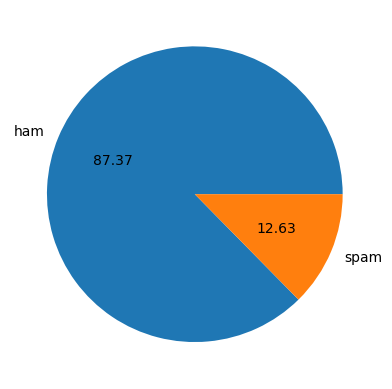

In [36]:
plt.pie(spam['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [38]:
# data is imbalanced

In [40]:
! pip install nltk
import nltk

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
spam['num_characters']=spam['text'].apply(len)

In [46]:
spam.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [48]:
# num of words
spam['num_words']=spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
spam['num_sentences']=spam['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [52]:
spam.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [54]:
spam[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
spam[spam['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
spam[spam['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [60]:
import seaborn as sns

E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

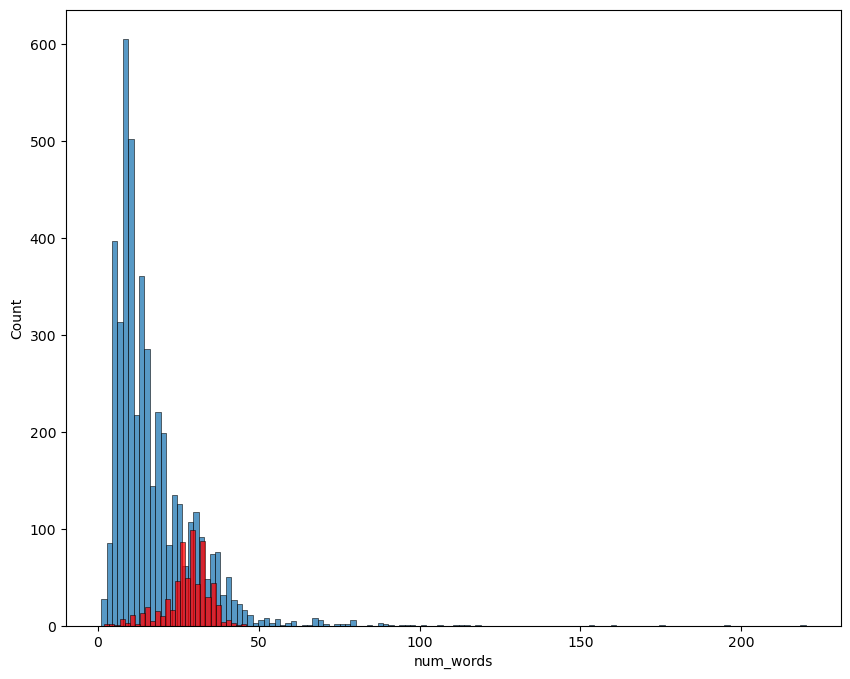

In [62]:
plt.figure(figsize=(10,8))
sns.histplot(spam[spam['target']==0]['num_words'])
sns.histplot(spam[spam['target']==1]['num_words'],color='r')

E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

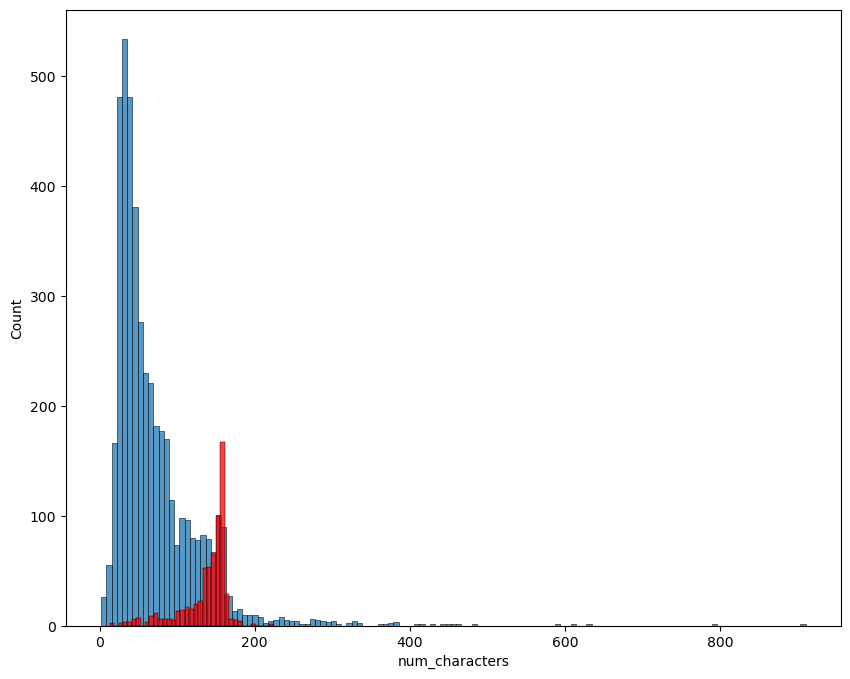

In [64]:
plt.figure(figsize=(10,8))
sns.histplot(spam[spam['target']==0]['num_characters'])
sns.histplot(spam[spam['target']==1]['num_characters'],color='r')

E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas.

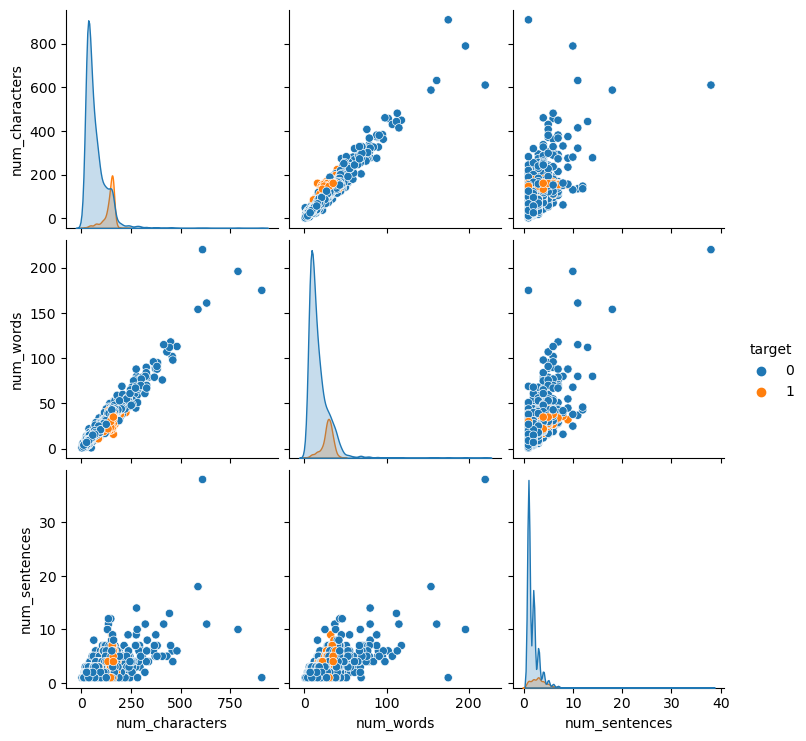

In [66]:
sns.pairplot(spam,hue='target')

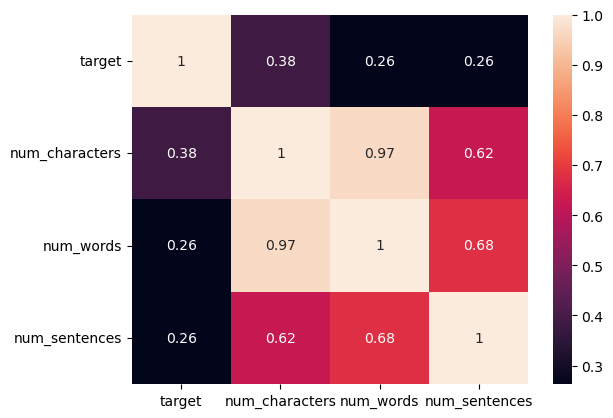

In [70]:
# Select only numerical columns from the DataFrame
numeric_df = spam.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

3.Data Preprocessing

a)Lower case

b)Tokenization

c)Removing special characters

d)Removing stop words and punctuation

e)Stemming



In [73]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [75]:
# download the stopwords resource
! python -m nltk.downloader stopwords

# import the stopwords module
from nltk.corpus import stopwords

# use the stopwords module
# stopwords.words('english')


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear() 
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)     
            

In [81]:
transform_text("I loved the YT lectures on Machine Learning. How about you?  .")

'love yt lectur machin learn'

In [83]:
spam['transform_text']=spam['text'].apply(transform_text)

In [85]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [87]:
spam_wc=wc.generate(spam[spam['target']==1]['transform_text'].str.cat(sep=" "))

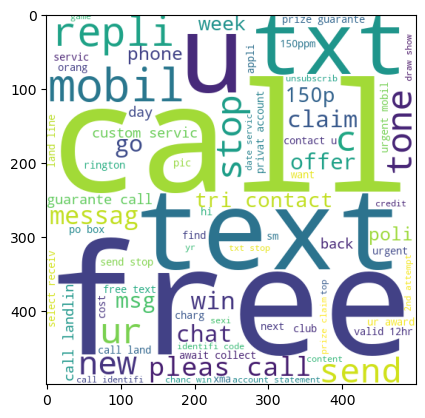

In [89]:
plt.imshow(spam_wc)

In [91]:
ham_wc=wc.generate(spam[spam['target']==0]['transform_text'].str.cat(sep=" "))

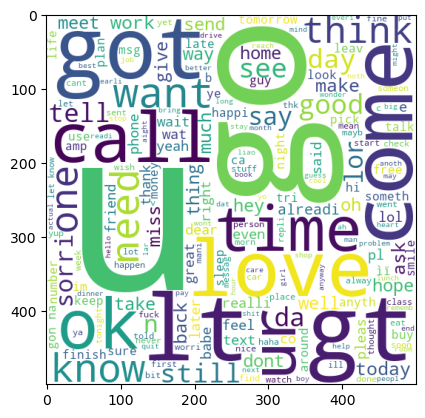

In [93]:
plt.imshow(ham_wc)

In [95]:
spam_corpus=[]
for msg in spam[spam['target']==1]['transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)


In [97]:
len(spam_corpus)

9939

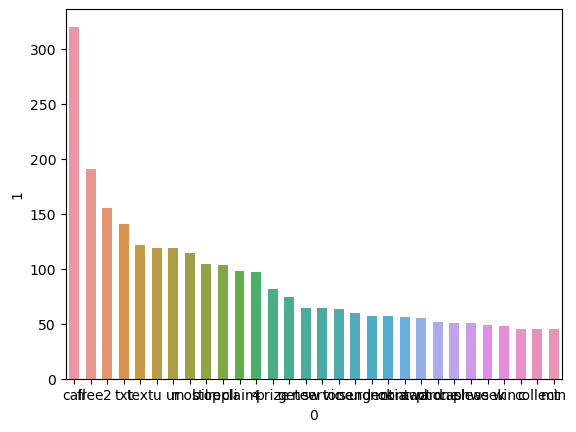

In [99]:
from collections import Counter
Counter=pd.DataFrame(Counter(spam_corpus).most_common(30))
Counter
sns.barplot(x=0,y=1,data=Counter,width=0.6)
# plt.xticks(rotaion='vertical')
plt.show()

In [101]:
ham_corpus=[]
for msg in spam[spam['target']==0]['transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

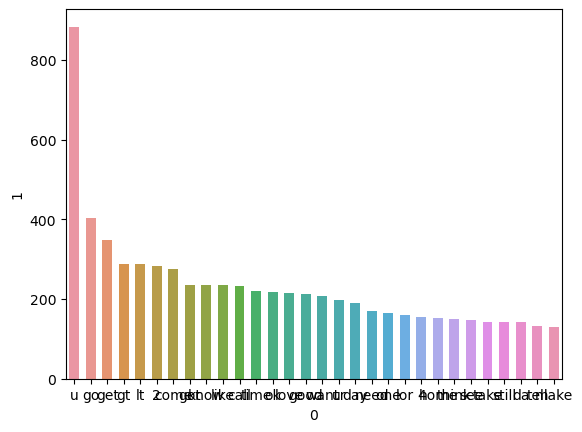

In [103]:
from collections import Counter
Counter=pd.DataFrame(Counter(ham_corpus).most_common(30))
Counter
sns.barplot(x=0,y=1,data=Counter,width=0.6)
# plt.xticks(rotaion='vertical')
plt.show()

4 Model building

In [106]:
spam.head(3)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [110]:
x=tfidf.fit_transform(spam['transform_text']).toarray()

In [112]:
y=spam['target'].values

In [114]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [120]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [122]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [124]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [126]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [128]:
bnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [130]:
pip install Xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC
from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [134]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
from sklearn.metrics import accuracy_score,precision_score




In [136]:
clfs= {
    "SVC":svc,
    "KN":knc,
    "MNB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}

In [138]:

from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # Print to check if accuracy_score and precision_score are callable
    print(f"accuracy_score: {accuracy_score}, precision_score: {precision_score}")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

accuracy_scores=[]
precision_scores=[]

clfs= {
    "SVC":svc,
    "KN":knc,
    "MNB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}


for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


accuracy_score: <function accuracy_score at 0x00000239F3CD2DE0>, precision_score: <function precision_score at 0x00000239F3CD3E20>
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
accuracy_score: <function accuracy_score at 0x00000239F3CD2DE0>, precision_score: <function precision_score at 0x00000239F3CD3E20>
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
accuracy_score: <function accuracy_score at 0x00000239F3CD2DE0>, precision_score: <function precision_score at 0x00000239F3CD3E20>
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
accuracy_score: <function accuracy_score at 0x00000239F3CD2DE0>, precision_score: <function precision_score at 0x00000239F3CD3E20>
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
accuracy_score: <function accuracy_score at 0x00000239F3CD2DE0>, precision_score: <function precision_score at 0x00000239F3CD3E20>
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
accuracy_score: <f

In [140]:
if len(clfs.keys()) == len(accuracy_scores) == len(precision_scores):
    performance_df = pd.DataFrame({
        "Algorithm": list(clfs.keys()),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores
    }).sort_values("Precision", ascending=False)
    print(performance_df)
else:
    print("Mismatch in lengths of the lists.")

   Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2        MNB  0.970986   1.000000
5         RF  0.975822   0.982906
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
4         LR  0.958414   0.970297
6   AdaBoost  0.960348   0.929204
10       xgb  0.967118   0.926230
9       GBDT  0.946809   0.919192
7        BgC  0.958414   0.868217
3         DT  0.927466   0.811881


In [142]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [144]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


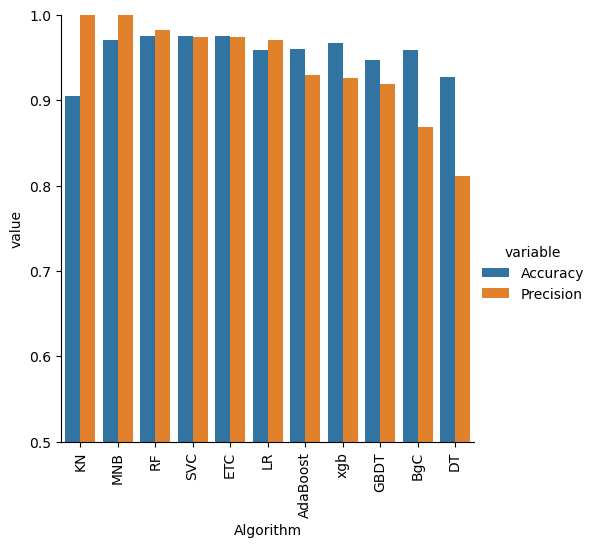

In [146]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1,kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [148]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max_ft_3000":accuracy_scores,"Precision_max_ft_3000":precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)

In [150]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_scaling":accuracy_scores,"Precision_scaling":precision_scores}).sort_values("Precision_scaling",ascending=False)

In [152]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [154]:
new_df_scaled=new_df.merge(temp_df,on="Algorithm")

In [156]:
# VOTING CLASSIFIERS
svc=SVC(kernel="sigmoid",gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [158]:
Voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [160]:
y_pred  = Voting.fit(x_train,y_train).predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",confusion_matrix(y_test,y_pred))

Accuracy 0.9816247582205029
Precision [[895   1]
 [ 18 120]]


applying stacking

In [163]:
jo9estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [165]:
from sklearn.ensemble import StackingClassifier

In [167]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",confusion_matrix(y_test,y_pred))

Accuracy 0.9671179883945842
Precision [[887   9]
 [ 25 113]]


In [169]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))